In [2]:
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import config
import praw
import nltk
import ssl

In [19]:
subreddit = 'investing'

user_agent = config.USER_AGENT
reddit = praw.Reddit(
    client_id=config.CLIENT_ID,
    client_secret=config.CLIENT_SECRET,
    user_agent=user_agent
)

In [20]:
# hot new rising top
headlines = set()
for submission in reddit.subreddit(subreddit).hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

137


In [21]:
df = pd.DataFrame(headlines)
df.head()

,0
0,Why I like $STIC soon to be $BARK aka BarkBox ...
1,UK - ETFs for US markets that come under ISA?
2,"What’s the disadvantage, if any, in using a fu..."
3,Collateralized Loan Obligations - CLOs
4,Daily General Discussion and spitballin thread...


In [22]:
df.to_csv('csv_files_headlines/' + subreddit + '.csv', header=False, encoding='utf-8', index=False)

In [23]:
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/bigminion/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line) # -> dict
    pol_score['headline'] = line
    results.append(pol_score)
    
pprint(results[:3], width=100)

[{'compound': 0.1027,
  'headline': 'Why I like $STIC soon to be $BARK aka BarkBox Risk range is $7 to $30.',
  'neg': 0.119,
  'neu': 0.739,
  'pos': 0.142},
 {'compound': 0.0,
  'headline': 'UK - ETFs for US markets that come under ISA?',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': -0.0772,
  'headline': 'What’s the disadvantage, if any, in using a fund like vanguards NJ Long-term '
              'tax-exempt fund (VNJTX)',
  'neg': 0.153,
  'neu': 0.71,
  'pos': 0.137}]


In [25]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.119,0.739,0.142,0.1027,Why I like $STIC soon to be $BARK aka BarkBox ...
1,0.000,1.000,0.000,0.0000,UK - ETFs for US markets that come under ISA?
2,0.153,0.710,0.137,-0.0772,"What’s the disadvantage, if any, in using a fu..."
3,0.000,1.000,0.000,0.0000,Collateralized Loan Obligations - CLOs
4,0.000,1.000,0.000,0.0000,Daily General Discussion and spitballin thread...


In [26]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1

In [27]:
df2 = df[['headline','label']]

In [28]:
df2.to_csv('csv_files_headlines/' + subreddit + '_headlines_labels.csv', encoding='utf-8', index=False)

In [29]:
df.label.value_counts()

 0    84
 1    40
-1    13
Name: label, dtype: int64

In [30]:
df.label.value_counts(normalize=True) * 100

 0    61.313869
 1    29.197080
-1     9.489051
Name: label, dtype: float64

In [31]:
print("Positive " + subreddit  +" headlines:\n")
pprint(list(df[df['label'] == 1 ].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

Positive investing headlines:

['School Project Help (Cryptocurrency)',
 'Merrill Edge blocks active ETFs?!',
 'With all these posts starting to pop up "parents retiring in X amount of years, what dividend ETF should they invest in?", Does this mean we\'re going to see the most recommended dividend ETFs '
 'increase in value?',
 'Redbox to go public later this year via special purp acq company Ticker = "RDBX"',
 "Wouldn't the rise of electric cars be a boon to natural gas? Natural gas plays?"]

Negative headlines:

['Snowflake EPS misses by $0.58, beats on revenue',
 'Why do high earning multiples imply a likelihood of low or even negative returns?',
 'Inflation risk is now the consensus trade. It is priced into equities already. Stocks will likely rally if further data shows inflation is indeed transitory.',
 'Thoughts on car companies P/E ratios? Most under 10 which seems really low to me',
 'Dividend stocks you would buy if all equities were to drop by at least 60%?']


<AxesSubplot:ylabel='label'>

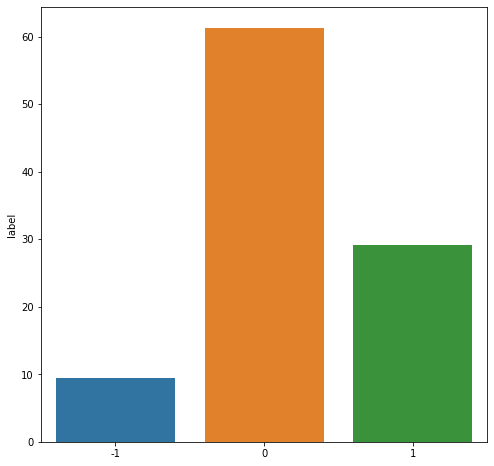

In [32]:
fig, ax = plt.subplots(figsize=(8, 8))
counts = df.label.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)

In [2]:
import datetime
time = datetime.datetime.now().replace(microsecond=0).isoformat()


In [3]:
type(time)

str